In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import csv

import pandas as pd
import matplotlib.pyplot as plt
import pickle
import datetime

In [2]:
from sklearn import linear_model

In [ ]:
from sklearn.model_selection import train_test_split

In [70]:
from sklearn.metrics import mean_squared_error as mse

# Single station

# Single station

In [3]:
df1 = pd.read_csv('/network/tmp1/barinpvi/data/preprocessed_canopex_envcan/100.csv')

df1['date'] = pd.to_datetime(df1['date'])
df1.index = df1['date']

In [4]:
df1.head()

,date,precip,evap,discharge,max_temp,min_temp,lat,lon
date,,,,,,,,
1968-02-01,1968-02-01,5.9554,NaN,NaN,-29.1428,-32.9766,54.752,-117.2057
1968-02-02,1968-02-02,7.8870,NaN,NaN,-29.8786,-31.8214,54.752,-117.2057
1968-02-03,1968-02-03,4.2104,NaN,NaN,-13.9552,-36.3428,54.752,-117.2057
1968-02-04,1968-02-04,0.0000,NaN,NaN,2.4909,-30.9786,54.752,-117.2057
1968-02-05,1968-02-05,0.0000,NaN,NaN,0.6552,-24.4662,54.752,-117.2057


In [6]:
discharge = df1['discharge'].fillna(method='bfill')

discharge = discharge.fillna(method='ffill')

In [19]:
precip = df1['precip'].fillna(method='bfill')

precip = precip.fillna(method='ffill')

In [54]:
max_temp = df1['max_temp'].fillna(method='bfill')

max_temp = max_temp.fillna(method='ffill')

In [23]:
precipitation = precip.values.reshape(-1, 1)

In [24]:
precipitation.shape

(16406, 1)

# Precip -> Discharge

In [74]:
X_train, X_test, y_train, y_test = train_test_split(precipitation, discharge.values, test_size=0.33, random_state=42)

In [75]:
reg = linear_model.LinearRegression().fit(X_train, y_train)

In [34]:
reg.score(X_train, y_train)

0.002078147750256054

In [35]:
reg.coef_

array([0.0285534])

In [36]:
reg.intercept_

0.4339131483733172

### Train

In [73]:
train_pred = reg.predict(X_train)

mse(train_pred, y_train)

### Test

In [49]:
pred = reg.predict(X_test)

Text(0.5, 1.0, 'Discharge (mm)')

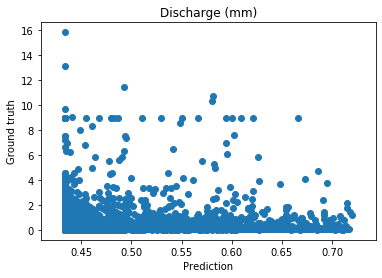

In [53]:
plt.scatter(pred, y_test)
plt.xlabel("Prediction")
plt.ylabel("Ground truth")
plt.title("Discharge (mm)")

In [71]:
mse(pred, y_test)

1.2721682485486046

# (Precip, Temp) -> Discharge

In [62]:
temperature = max_temp.values.reshape(-1, 1)

In [63]:
X = np.concatenate((precipitation, temperature), axis=1)

In [64]:
X.shape

(16406, 2)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, discharge.values, test_size=0.33, random_state=42)

In [78]:
reg = linear_model.LinearRegression().fit(X_train, y_train)

In [79]:
reg.score(X_train, y_train)

0.015411199084537919

### Train

In [80]:
train_pred = reg.predict(X_train)

print(mse(train_pred, y_train))

1.4776407119376898


### Test

In [81]:
pred = reg.predict(X_test)

Text(0.5, 1.0, 'Discharge (mm)')

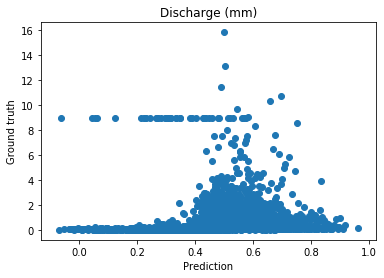

In [82]:
plt.scatter(pred, y_test)
plt.xlabel("Prediction")
plt.ylabel("Ground truth")
plt.title("Discharge (mm)")

In [83]:
mse(pred, y_test)

1.2544508515443675

# (Precip, Month) -> Discharge

In [84]:
month = df1['date'].dt.month

In [110]:
df1['month_sin'] = np.sin(2 * np.pi * month/12.0)
df1['month_cos'] = np.cos(2 * np.pi * month/12.0)

In [117]:
#df1 = df1.drop(columns=['hour_cos', 'hour_sin'])

In [118]:
df1.head()

,date,precip,evap,discharge,max_temp,min_temp,lat,lon,month_sin,month_cos
date,,,,,,,,,,
1968-02-01,1968-02-01,5.9554,NaN,NaN,-29.1428,-32.9766,54.752,-117.2057,0.866025,0.5
1968-02-02,1968-02-02,7.8870,NaN,NaN,-29.8786,-31.8214,54.752,-117.2057,0.866025,0.5
1968-02-03,1968-02-03,4.2104,NaN,NaN,-13.9552,-36.3428,54.752,-117.2057,0.866025,0.5
1968-02-04,1968-02-04,0.0000,NaN,NaN,2.4909,-30.9786,54.752,-117.2057,0.866025,0.5
1968-02-05,1968-02-05,0.0000,NaN,NaN,0.6552,-24.4662,54.752,-117.2057,0.866025,0.5


In [120]:
month_sin = df1['month_sin'].values.reshape(-1, 1)

In [121]:
month_cos = df1['month_cos'].values.reshape(-1, 1)

In [122]:
X = np.concatenate((precipitation, month_sin, month_cos), axis=1)

In [123]:
X.shape

(16406, 3)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, discharge.values, test_size=0.33, random_state=42)

In [125]:
reg = linear_model.LinearRegression().fit(X_train, y_train)

In [126]:
reg.score(X_train, y_train)

0.04298822698539151

### Train

In [127]:
train_pred = reg.predict(X_train)

print(mse(train_pred, y_train))

1.4362539532190708


### Test

In [128]:
pred = reg.predict(X_test)

Text(0.5, 1.0, 'Discharge (mm)')

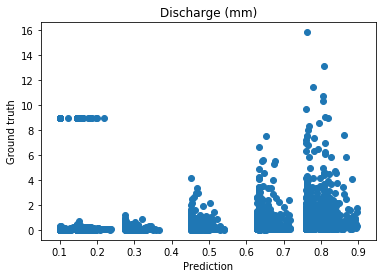

In [129]:
plt.scatter(pred, y_test)
plt.xlabel("Prediction")
plt.ylabel("Ground truth")
plt.title("Discharge (mm)")

In [130]:
mse(pred, y_test)

1.214226370680956

# Next: centralize/normalize discharge ground truth

In [131]:
from sklearn import preprocessing

In [136]:
X_train_scaled = preprocessing.scale(X_train)

In [133]:
X_train_scaled

array([[-0.48401167, -1.40207351,  0.00520905],
       [-0.50896236, -0.69361475,  1.22777585],
       [ 4.37513389, -1.40207351,  0.00520905],
       ...,
       [-0.54597936, -0.69361475,  1.22777585],
       [-0.54597936,  0.014844  , -1.40648948],
       [-0.54597936,  0.72330276, -1.21735774]])

In [135]:
y_train_scaled = preprocessing.scale(y_train)

In [137]:
X_test_scaled = preprocessing.scale(X_test)

In [138]:
y_test_scaled = preprocessing.scale(y_test)